In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
data.duplicated().sum()

24

In [7]:
data=data.drop_duplicates()

# EDA

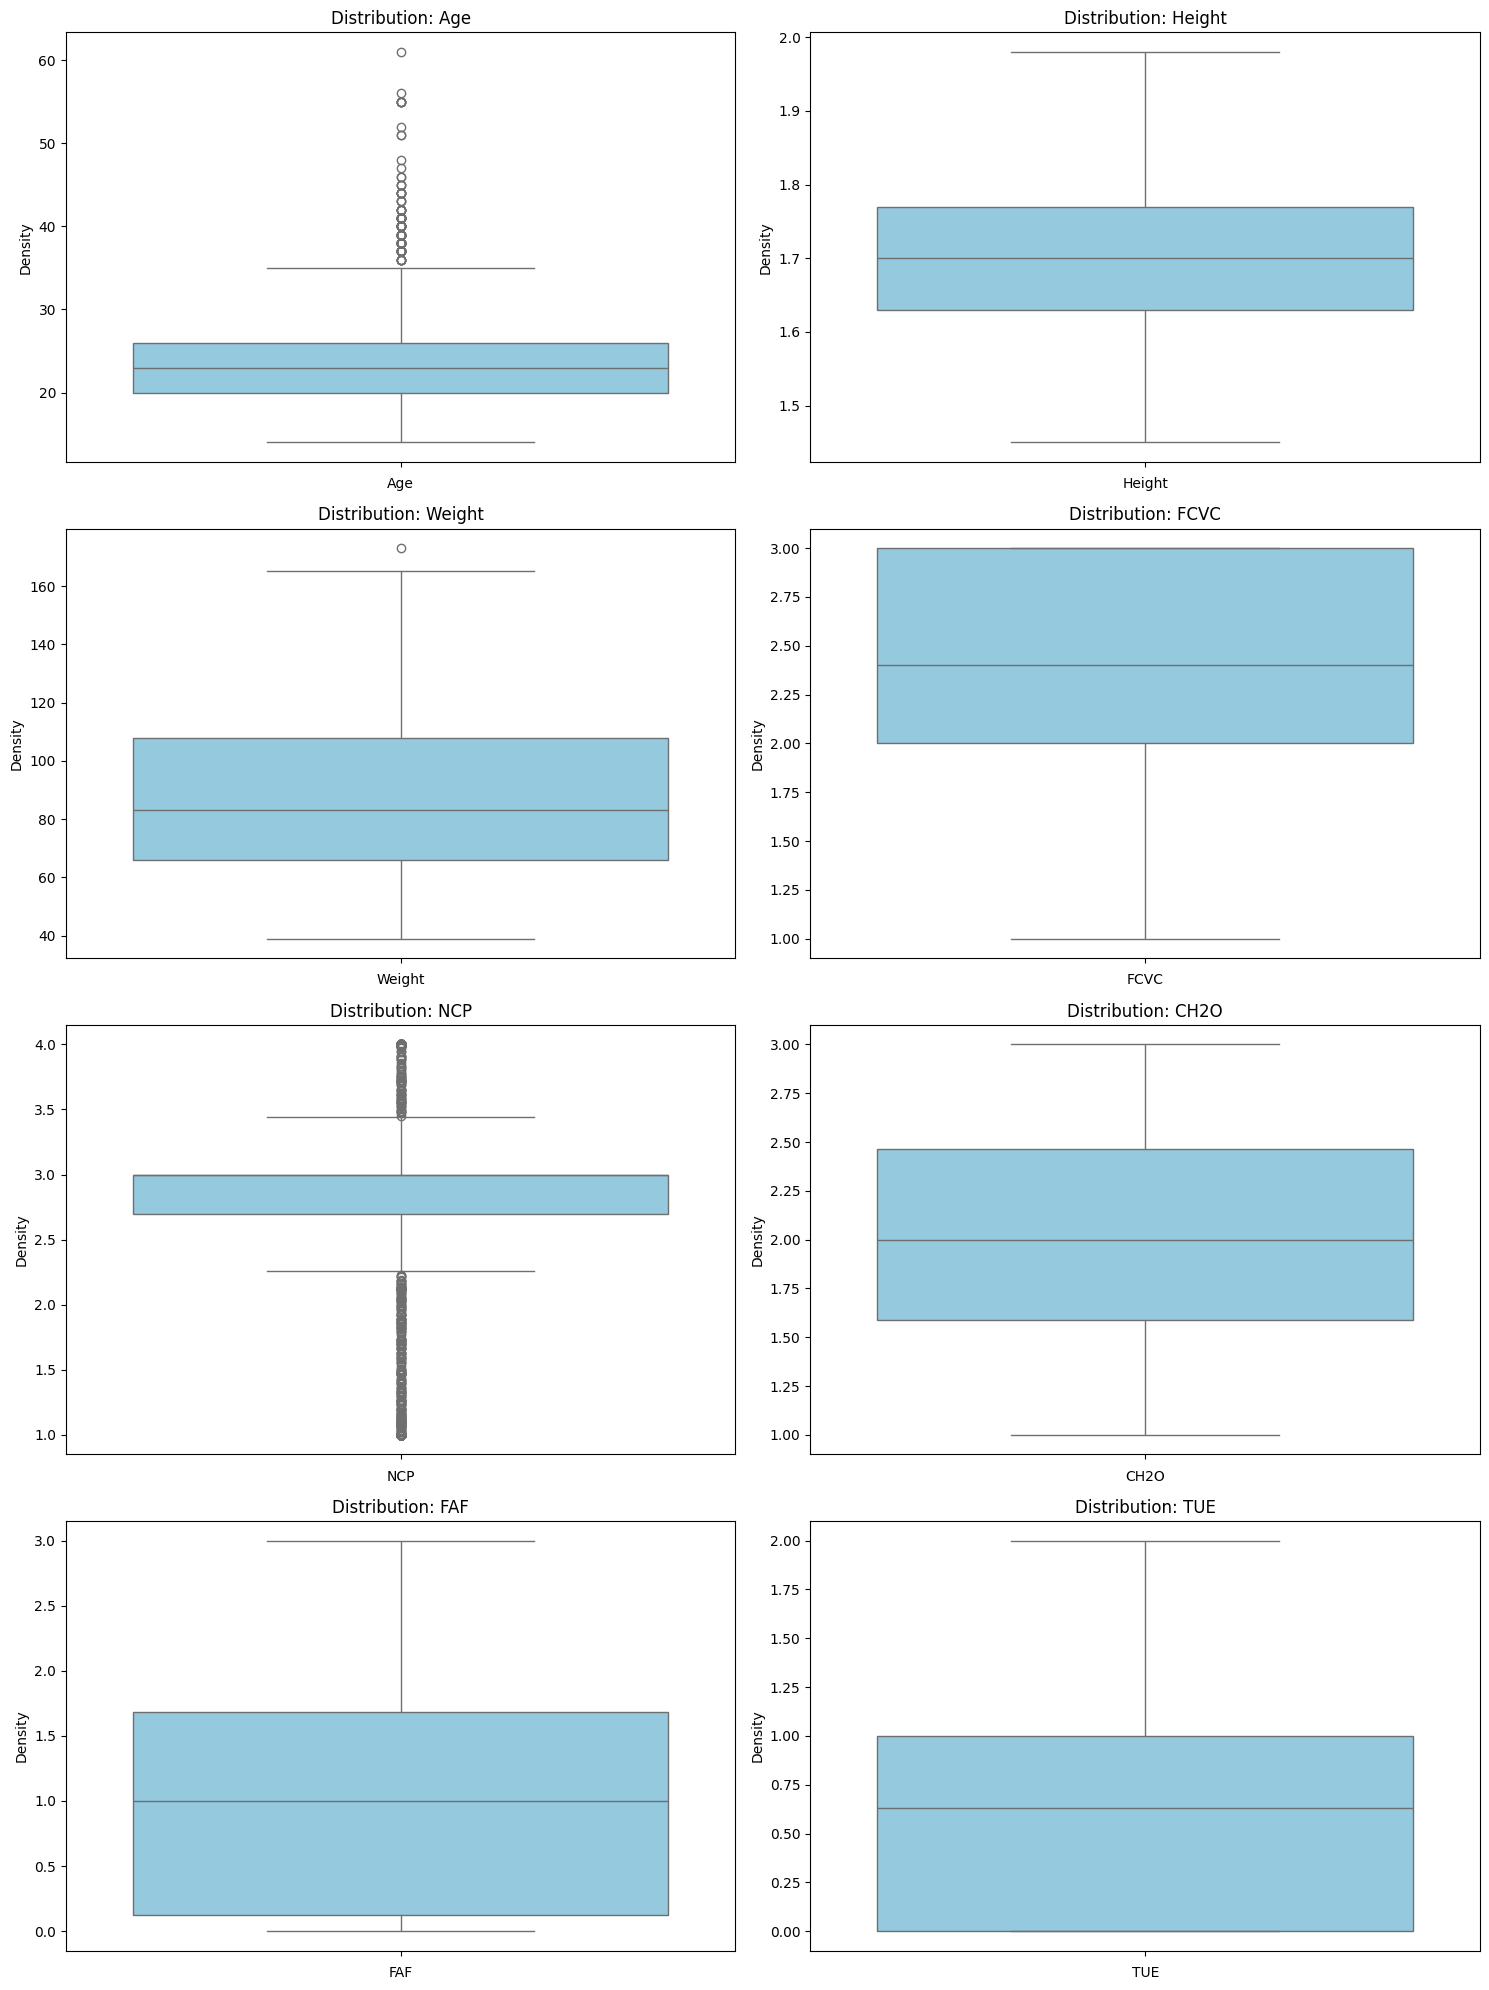

In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i) 
    sns.boxplot(data[column], color='skyblue')
    plt.title(f"Distribution: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

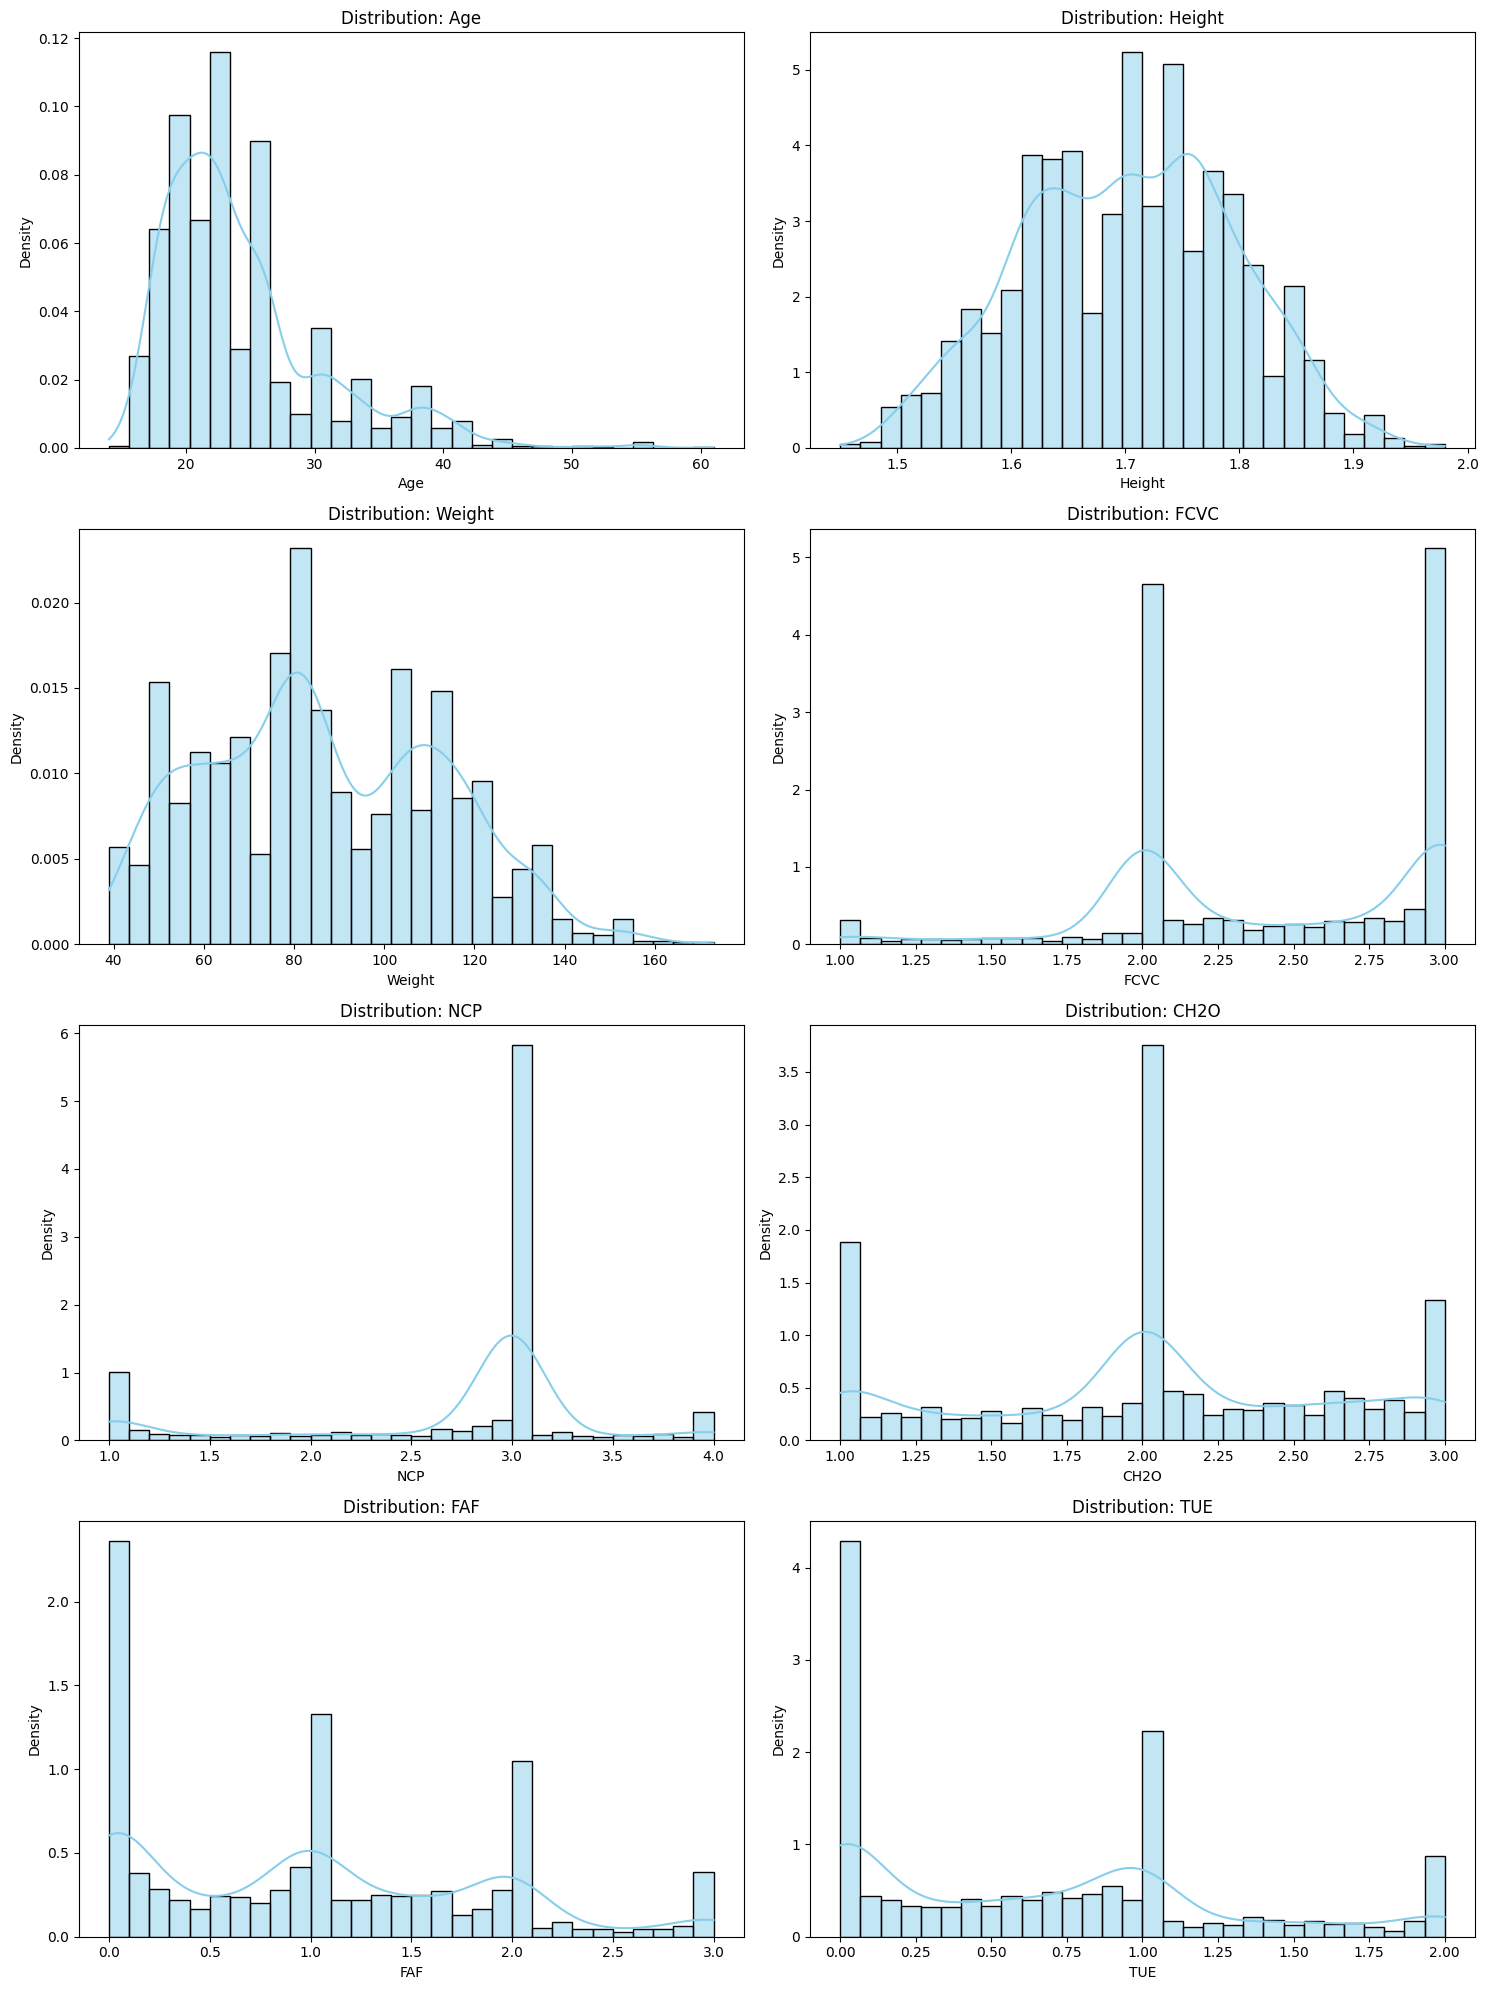

In [9]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i) 
    sns.histplot(data[column], kde=True, stat='density', color='skyblue', bins=30)
    plt.title(f"Distribution: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [10]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["family_history_with_overweight"]=le.fit_transform(data["family_history_with_overweight"])
data["FAVC"]=le.fit_transform(data["FAVC"])
data["CAEC"]=le.fit_transform(data["CAEC"])
data["SMOKE"]=le.fit_transform(data["SMOKE"])
data["SCC"]=le.fit_transform(data["SCC"])
data["CALC"]=le.fit_transform(data["CALC"])
data["MTRANS"]=le.fit_transform(data["MTRANS"])
data["NObeyesdad"]=le.fit_transform(data["NObeyesdad"])

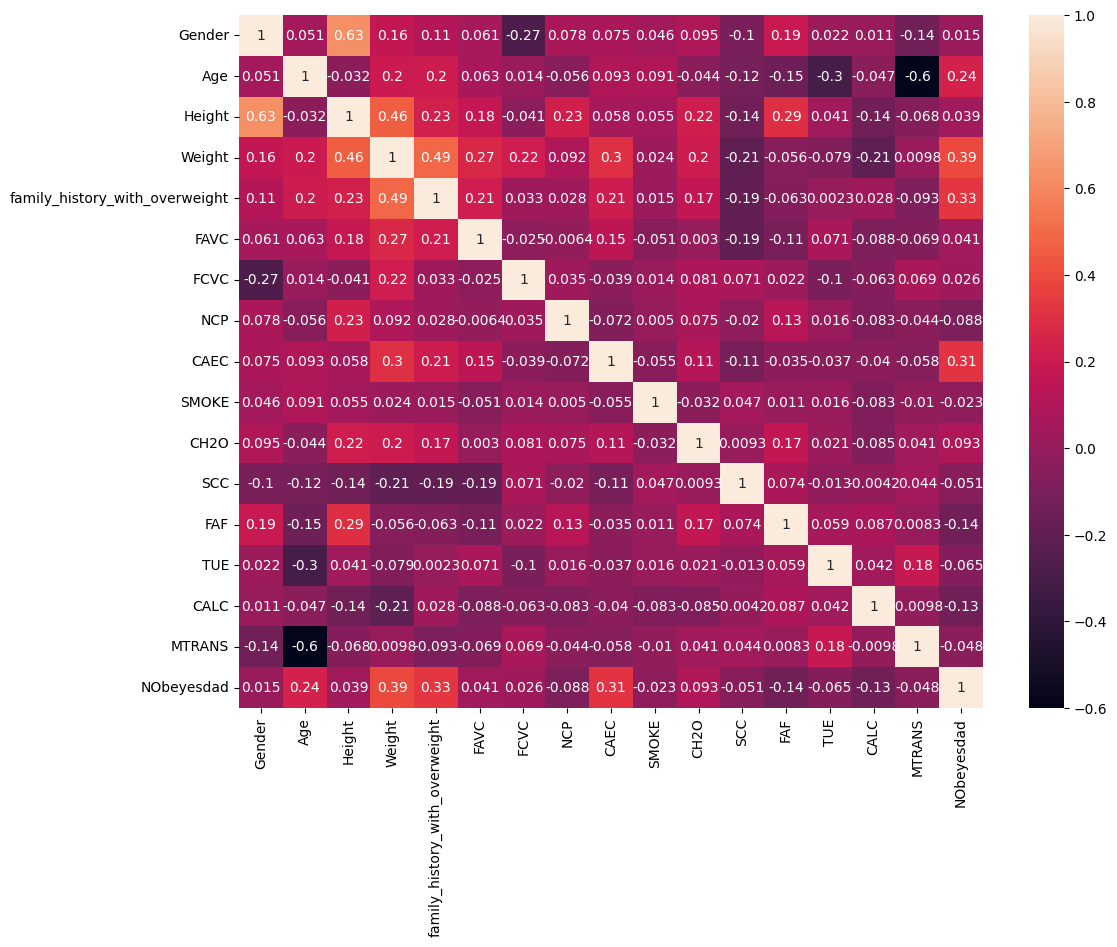

In [11]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Feature Engineering

In [12]:
x=data.drop(["NObeyesdad"],axis=1)
y=data["NObeyesdad"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Models

In [13]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "KNN":KNeighborsClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression()
}

# Results

In [18]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")  
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print(f"Precision: {precision*100}")
    print(f"F1 Score: {f1*100}")
    print(f"Recall: {recall*100}")
    print("-" * 30)

Model: Random Forest Classifier
Accuracy: 94.6360153256705
Precision: 94.75869331198126
F1 Score: 94.67933064823654
Recall: 94.6360153256705
------------------------------
Model: Decision Tree Classifier
Accuracy: 95.01915708812261
Precision: 95.00308621147859
F1 Score: 95.00627234856275
Recall: 95.01915708812261
------------------------------
Model: Ada Boost Classifier
Accuracy: 33.14176245210728
Precision: 30.27578582536712
F1 Score: 26.176228275212527
Recall: 33.14176245210728
------------------------------
Model: KNN
Accuracy: 80.65134099616859
Precision: 80.2395918764413
F1 Score: 79.72343253112734
Recall: 80.65134099616859
------------------------------
Model: Gradient Boosting Classifier
Accuracy: 96.55172413793103
Precision: 96.58573590198358
F1 Score: 96.55803710200267
Recall: 96.55172413793103
------------------------------
Model: Logistic Regression
Accuracy: 85.82375478927203
Precision: 86.17953129287173
F1 Score: 85.63416943923086
Recall: 85.82375478927203
---------------

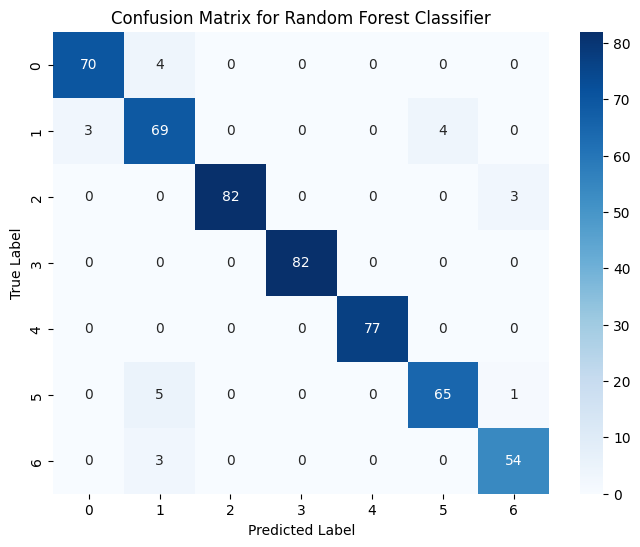

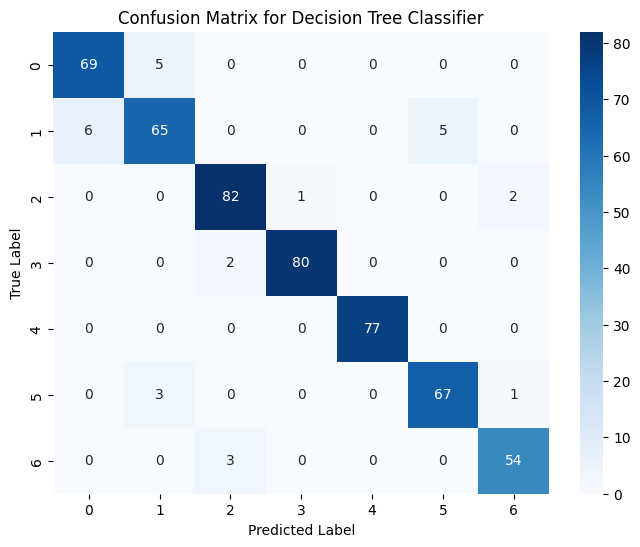

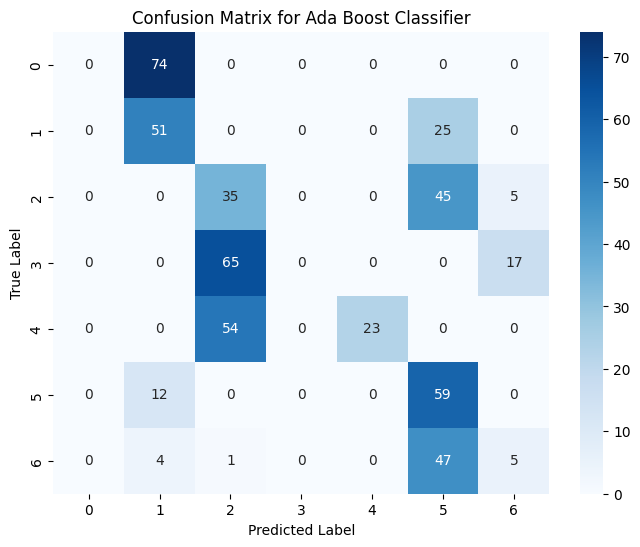

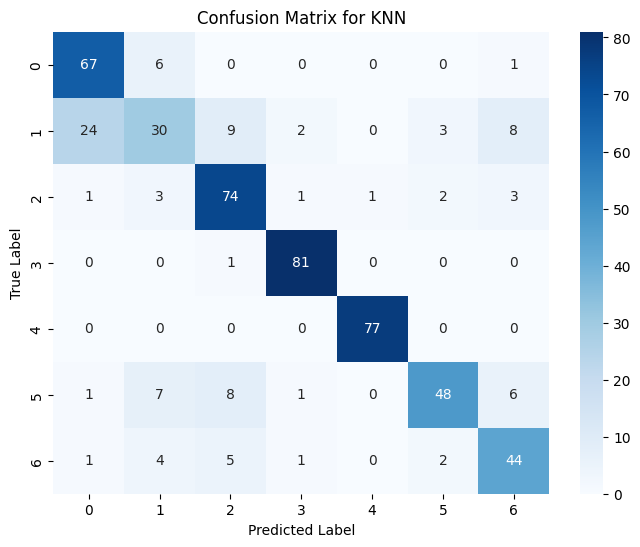

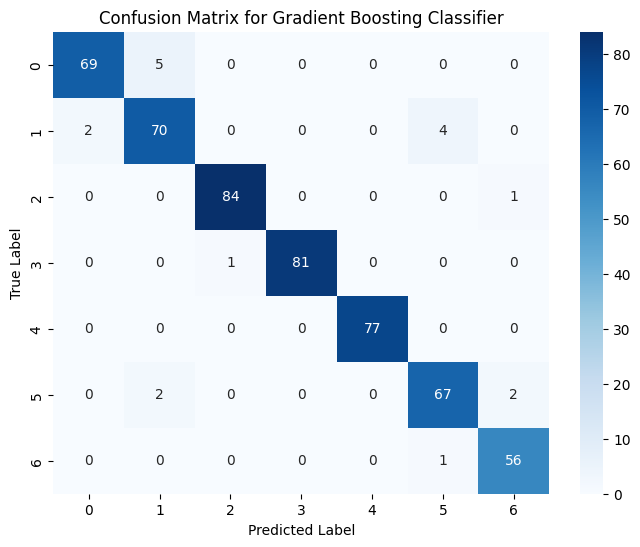

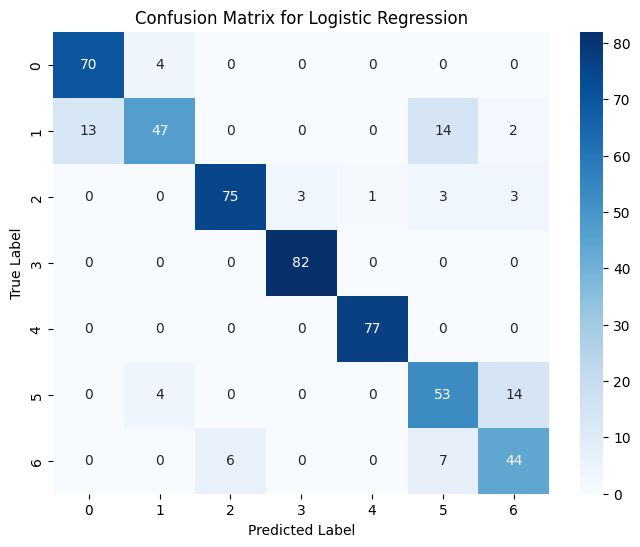

In [16]:
accuracy_results={}
for name,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<Figure size 1400x600 with 0 Axes>

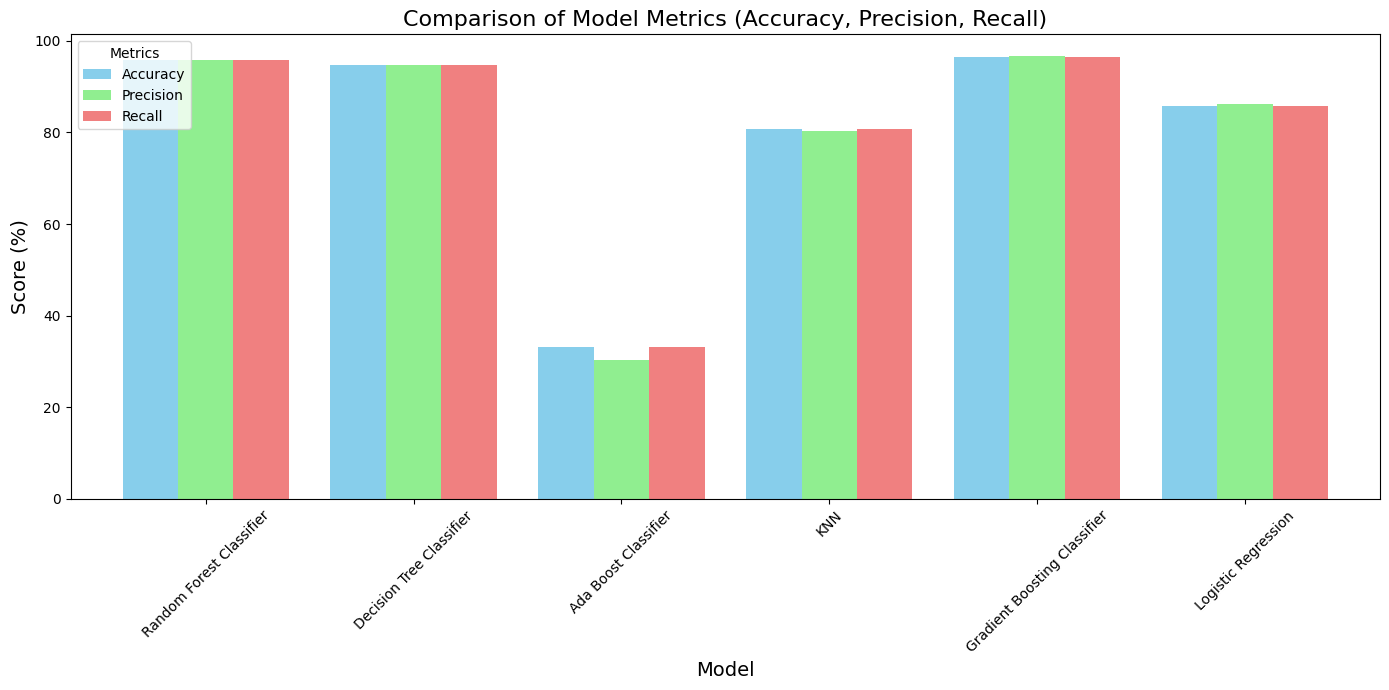

In [17]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(14, 6))
metrics_df.set_index('Model').plot(kind='bar', width=0.8, figsize=(14, 7), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Model Metrics (Accuracy, Precision, Recall)', fontsize=16)
plt.ylabel('Score (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()